In [9]:
from kan import *
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


cpu


In [10]:
data = pd.read_csv('file_for_input/all_hour/SBER_tradestats_test_hour.csv')
data = data[['vol','val','trades','trades_b','trades_s', 'val_b','val_s','vol_b','vol_s','pr_open_hour','pr_high_hour','pr_low_hour','pr_close_hour']] # Не добавлются сюда другие лейблы
data_lable= data [['pr_close_hour']]

data_tensor = torch.tensor(data.values, dtype=torch.float32)
data_tensor_lable=torch.tensor(data_lable.values, dtype=torch.float32)
print (data_tensor.shape)

torch.Size([8525, 13])


In [11]:
# Убедитесь, что device определен (проверить код в этой ячейке)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Создание датасета
dataset = create_dataset_from_data(data_tensor, data_tensor_lable, train_ratio=0.8, device=device)

# Проверка размеров датасета
print(dataset['train_input'].shape)
print(dataset['train_label'].shape)
print(dataset['test_input'].shape)
print(dataset['test_label'].shape)


torch.Size([6820, 13])
torch.Size([6820, 1])
torch.Size([1705, 13])
torch.Size([1705, 1])


In [12]:
dataset['train_input']

tensor([[1.4251e+06, 2.9364e+09, 1.7259e+04,  ..., 2.0717e+02, 2.0480e+02,
         2.0624e+02],
        [5.3000e+06, 1.2414e+10, 8.2002e+04,  ..., 2.3950e+02, 2.3051e+02,
         2.3379e+02],
        [3.4529e+05, 1.2862e+09, 9.3770e+03,  ..., 3.7337e+02, 3.7169e+02,
         3.7196e+02],
        ...,
        [6.5146e+05, 1.7718e+09, 1.6407e+04,  ..., 2.7249e+02, 2.7064e+02,
         2.7212e+02],
        [2.5977e+05, 6.9531e+08, 5.2980e+03,  ..., 2.6815e+02, 2.6718e+02,
         2.6814e+02],
        [1.2324e+06, 2.2300e+09, 1.7244e+04,  ..., 1.8240e+02, 1.7911e+02,
         1.8065e+02]])

In [13]:
dataset['train_label']  

tensor([[206.2400],
        [233.7900],
        [371.9600],
        ...,
        [272.1200],
        [268.1400],
        [180.6500]])

In [14]:
dataset['train_input'].shape, dataset['train_label'].shape 

(torch.Size([6820, 13]), torch.Size([6820, 1]))

# initialize KAN with G=3


In [34]:
model = KAN(width=[13,10,1], grid=200, k=3, seed=1, device=device)

checkpoint directory created: ./model
saving model version 0.0


In [35]:
rez = model.train(True)
print(rez)

MultKAN(
  (act_fun): ModuleList(
    (0-1): 2 x KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0-1): 2 x Symbolic_KANLayer()
  )
)


In [36]:
model.fit(dataset, opt="LBFGS", steps=50);


description:   0%|                                                           | 0/50 [00:00<?, ?it/s]
| train_loss: 1.20e+05 | test_loss: 5.60e+04 | reg: 0.00e+00 | :   0%|       | 0/50 [00:16<?, ?it/s]
| train_loss: 1.20e+05 | test_loss: 5.60e+04 | reg: 0.00e+00 | :   2%| | 1/50 [00:16<13:08, 16.09s/i
| train_loss: 1.71e+03 | test_loss: 1.56e+03 | reg: 0.00e+00 | :   2%| | 1/50 [00:31<13:08, 16.09s/i
| train_loss: 1.71e+03 | test_loss: 1.56e+03 | reg: 0.00e+00 | :   4%| | 2/50 [00:31<12:35, 15.73s/i
| train_loss: 1.66e+03 | test_loss: 1.52e+03 | reg: 0.00e+00 | :   4%| | 2/50 [00:45<12:35, 15.73s/i
| train_loss: 1.66e+03 | test_loss: 1.52e+03 | reg: 0.00e+00 | :   6%| | 3/50 [00:45<11:46, 15.04s/i
| train_loss: 1.61e+03 | test_loss: 1.47e+03 | reg: 0.00e+00 | :   6%| | 3/50 [01:00<11:46, 15.04s/i
| train_loss: 1.61e+03 | test_loss: 1.47e+03 | reg: 0.00e+00 | :   8%| | 4/50 [01:00<11:23, 14.87s/i
| train_loss: 1.54e+03 | test_loss: 1.41e+03 | reg: 0.00e+00 | :   8%| | 4/50 [01:14<11:23

saving model version 0.1


In [37]:
model = model.refine(350)

saving model version 0.2


In [38]:
model.fit(dataset, opt="LBFGS", steps=50);


description:   0%|                                                           | 0/50 [00:00<?, ?it/s]
| train_loss: nan | test_loss: nan | reg: 0.00e+00 | :   0%|                 | 0/50 [00:38<?, ?it/s]
| train_loss: nan | test_loss: nan | reg: 0.00e+00 | :   2%|▏        | 1/50 [00:38<31:16, 38.30s/it]
| train_loss: nan | test_loss: nan | reg: 0.00e+00 | :   2%|▏        | 1/50 [01:26<31:16, 38.30s/it]
| train_loss: nan | test_loss: nan | reg: 0.00e+00 | :   4%|▎        | 2/50 [01:26<35:09, 43.94s/it]
| train_loss: nan | test_loss: nan | reg: 0.00e+00 | :   4%|▎        | 2/50 [02:16<35:09, 43.94s/it]
| train_loss: nan | test_loss: nan | reg: 0.00e+00 | :   6%|▌        | 3/50 [02:49<44:09, 56.36s/it]


KeyboardInterrupt: 

In [24]:
model.train(dataset, opt="LBFGS", steps=20);

TypeError: Module.train() got an unexpected keyword argument 'opt'

In [ ]:
KAN.model.t

тест примеров из кода

In [41]:

model = KAN(width=[13,5,1], grid=5, k=3, seed=0)
print(model.grid)
x = torch.rand(100,13)
model.get_act(x)
model = model.refine(10)
print(model.grid)

checkpoint directory created: ./model
saving model version 0.0
5
saving model version 0.1
10


In [42]:
model.fit(dataset, opt="LBFGS", steps=50);


description:   0%|                                                           | 0/50 [00:00<?, ?it/s]
| train_loss: nan | test_loss: nan | reg: 0.00e+00 | :   0%|                 | 0/50 [00:01<?, ?it/s]
| train_loss: nan | test_loss: nan | reg: 0.00e+00 | :   2%|▏        | 1/50 [00:01<00:53,  1.09s/it]
| train_loss: nan | test_loss: nan | reg: 0.00e+00 | :   2%|▏        | 1/50 [00:01<00:53,  1.09s/it]
| train_loss: nan | test_loss: nan | reg: 0.00e+00 | :   4%|▎        | 2/50 [00:01<00:46,  1.03it/s]
| train_loss: nan | test_loss: nan | reg: 0.00e+00 | :   4%|▎        | 2/50 [00:02<00:46,  1.03it/s]
| train_loss: nan | test_loss: nan | reg: 0.00e+00 | :   6%|▌        | 3/50 [00:02<00:42,  1.10it/s]
| train_loss: nan | test_loss: nan | reg: 0.00e+00 | :   6%|▌        | 3/50 [00:03<00:42,  1.10it/s]
| train_loss: nan | test_loss: nan | reg: 0.00e+00 | :   8%|▋        | 4/50 [00:03<00:40,  1.13it/s]
| train_loss: nan | test_loss: nan | reg: 0.00e+00 | :   8%|▋        | 4/50 [00:04<00:40, 

saving model version 0.2


In [15]:
grids = np.array([3,10,20,50,100])

train_losses = []
test_losses = []
steps = 20
k = 3

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[13,1,1], grid=grids[i], k=k, seed=1, device=device)
    if i != 0:
        model = model.refine(grids[i])
    results = model.fit(dataset, opt="LBFGS", steps=steps)
    train_losses += results['train_loss']
    test_losses += results['test_loss']

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.38e+01 | test_loss: 8.36e+01 | reg: 9.70e+00 | : 100%|█| 20/20 [00:04<00:00,  4.49it


saving model version 0.1
saving model version 0.2


| train_loss: nan | test_loss: nan | reg: 0.00e+00 | :  40%|███▌     | 8/20 [00:06<00:09,  1.33it/s]


KeyboardInterrupt: 

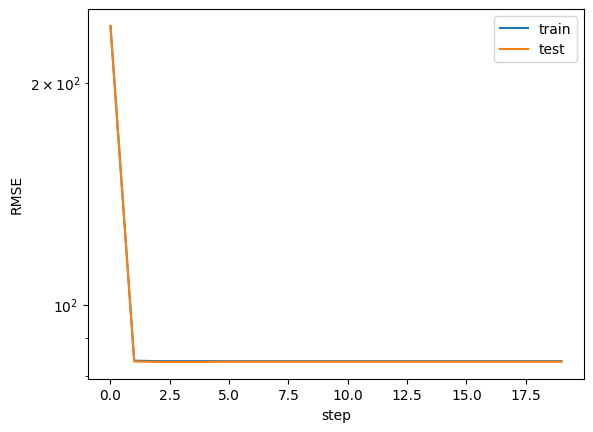

In [16]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

In [155]:
grids = 3 #np.array([3,10,20,50,100])

train_losses = []
test_losses = []
steps = 60
k = 3



model = KAN(width=[13,100,1], grid=grids, device=device) # убрал seed и k


results = model.fit(dataset, opt="LBFGS", steps=steps)
model = model.refine(grids)
train_losses += results['train_loss']
test_losses += results['test_loss']

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.95e+04 | test_loss: 1.86e+04 | reg: 2.11e+02 | : 100%|█| 60/60 [02:27<00:00,  2.45s/


saving model version 0.1
saving model version 0.2
